#**Penerapan beberapa metode Machine Learning pada dataset Iris**

###Import Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Import dataset iris menggunakan dataframe pandas

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/niswatulsifa/data_iris/master/IrisDataset.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Kode diatas digunakan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species' dalam sebuah DataFrame yang disimpan dalam variabel 'df'.

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Mengembalikan daftar kolom yang ada dalam DataFrame yang disimpan dalam variabel 'df'.

In [8]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

Memisahkan data dalam DataFrame 'df' menjadi dua bagian, dengan kolom 0 hingga 3 (indeks 0, 1, 2, dan 3) disimpan dalam variabel 'X' dan kolom 4 disimpan dalam variabel 'y'.

###Membuat gambar histogram dari empat fitur dalam DataFrame 'X'

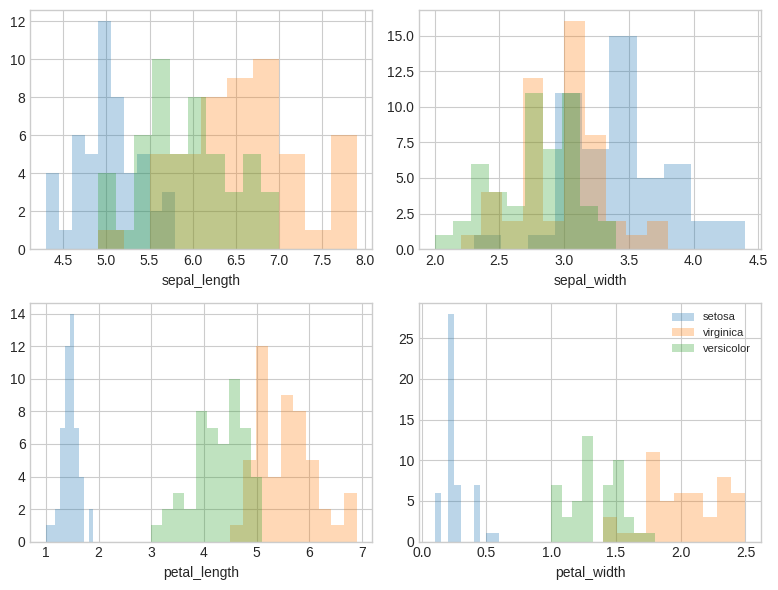

In [9]:
label_dict={1: 'setosa',
           2: 'virginica',
           3: 'versicolor'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('setosa','virginica','versicolor'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

###Splitting Data 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Preprocessing Menggunakan StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Metode Naive Bayes**

###Import modul GaussianNB

GaussianNB adalah implementasi dari algoritma Naive Bayes dengan asumsi bahwa fitur-fitur yang independen diambil dari distribusi Gaussian.

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Membuat objek GaussianNB yang akan digunakan sebagai model klasifikasi. Kemudian melatih model GaussianNB menggunakan data latih X_train dan label latih y_train. Model akan belajar untuk melakukan klasifikasi berdasarkan prinsip Naive Bayes.

###Melakukan Prediksi

In [13]:
y_pred = classifier.predict(X_test) 
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

Menggunakan model GaussianNB yang telah dilatih untuk melakukan prediksi pada data uji X_test. Hasil prediksi disimpan dalam variabel y_pred.

###Menghitung Akurasi dan menampilkan Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

1. Menggunakan fungsi confusion_matrix untuk menghitung matriks kebingungan antara label sebenarnya y_test dan label yang diprediksi y_pred. Hasilnya disimpan dalam variabel cm.
2. Menghitung nilai akurasi model pada data uji menggunakan accuracy_score. Accuracy score adalah metrik yang digunakan untuk mengukur akurasi model klasifikasi.

###Membuat Dataframe yang berisi menampilkan label sebenarnya dan label yang diprediksi untuk setiap data pada data uji.

In [15]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


#**Metode KNN**

###Import Modul KNeighborsClassifier

KNeighborsClassifier adalah algoritma pembelajaran mesin yang digunakan untuk klasifikasi berdasarkan k-nearest neighbors (k tetangga terdekat).

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

1. Membuat objek KNeighborsClassifier dengan n_neighbors yang ditetapkan sebagai 5, yang berarti model akan menggunakan 5 tetangga terdekat untuk melakukan klasifikasi.
2. Melatih model KNN menggunakan data latih X_train dan label latih y_train. Model akan belajar untuk menentukan klasifikasi berdasarkan tetangga terdekat.

###Melakukan Prediksi

In [17]:
y_pred = classifier.predict(X_test) 
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

Model KNN yang sudah dilatih sebelumnya akan dilakukan prediksi dengan data uji yang kemudian hasilnya disimpan dalam variabel y_pred.

###Menghitung Akurasi dan menampilkan Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

1. Menggunakan fungsi confusion_matrix untuk menghitung matriks kebingungan antara label sebenarnya y_test dan label yang diprediksi y_pred. Hasilnya disimpan dalam variabel cm.
2. Menghitung nilai akurasi model pada data uji menggunakan accuracy_score. Accuracy score adalah metrik yang digunakan untuk mengukur akurasi model klasifikasi.

###Membuat Dataframe yang berisi menampilkan label sebenarnya dan label yang diprediksi untuk setiap data pada data uji.

In [19]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


#**Metode ANN**

###Import Modul MLPClassifier

MLPClassifier adalah sebuah model Artificial Neural Network (ANN) dengan multi-layer perceptron yang digunakan untuk klasifikasi.

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

###Konfigurasi Pada Modul MLPClassifier

In [21]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.001)

Membuat objek MLPClassifier dengan konfigurasi tertentu.

1. hidden_layer_sizes=(100,100,100) menunjukkan bahwa terdapat tiga layer tersembunyi dengan masing-masing 100 node.
2. max_iter=1000 menentukan jumlah iterasi maksimum selama pelatihan.
3. alpha=0.0001 adalah parameter regulasi.
4. solver='sgd' menggunakan stochastic gradient descent sebagai solver.
5. verbose=10 akan mencetak pesan verbose setiap 10 iterasi.
6. random_state=21 menentukan seed untuk inisialisasi bobot secara acak.
7. tol=0.001 adalah toleransi penghentian pelatihan.

###Melatih Model MLPClassifier

Melatih model MLPClassifier menggunakan data latih X_train dan label latih y_train. Model akan belajar untuk melakukan klasifikasi menggunakan metode backpropagation. Kemudian melakukan prediksi pada data uji dan hasilnya disimpan dalam variabel y_pred.

In [22]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

Iteration 1, loss = 1.09637364
Iteration 2, loss = 1.09483420
Iteration 3, loss = 1.09264147
Iteration 4, loss = 1.08986435
Iteration 5, loss = 1.08657311
Iteration 6, loss = 1.08282960
Iteration 7, loss = 1.07867396
Iteration 8, loss = 1.07415795
Iteration 9, loss = 1.06932968
Iteration 10, loss = 1.06422926
Iteration 11, loss = 1.05888916
Iteration 12, loss = 1.05334934
Iteration 13, loss = 1.04763614
Iteration 14, loss = 1.04178257
Iteration 15, loss = 1.03579066
Iteration 16, loss = 1.02968925
Iteration 17, loss = 1.02352094
Iteration 18, loss = 1.01729766
Iteration 19, loss = 1.01103150
Iteration 20, loss = 1.00473555
Iteration 21, loss = 0.99841789
Iteration 22, loss = 0.99212797
Iteration 23, loss = 0.98584814
Iteration 24, loss = 0.97956369
Iteration 25, loss = 0.97329485
Iteration 26, loss = 0.96704290
Iteration 27, loss = 0.96082297
Iteration 28, loss = 0.95463224
Iteration 29, loss = 0.94845281
Iteration 30, loss = 0.94230692
Iteration 31, loss = 0.93620096
Iteration 32, los

###Menghitung Akurasi Model

Menghitung akurasi model dengan membandingkan label sebenarnya y_test dengan label yang diprediksi y_pred menggunakan fungsi accuracy_score. Nilai akurasi akan dihasilkan sebagai output.

In [23]:
accuracy_score(y_test, y_pred)

0.9333333333333333

###Membuat Dataframe yang berisi menampilkan label sebenarnya dan label yang diprediksi untuk setiap data pada data uji.

In [24]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,virginica
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


#**Metode DecisionTree**

###Import Modul DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree Classifier adalah algoritma pembelajaran mesin yang digunakan untuk membangun model klasifikasi berdasarkan aturan keputusan berhirarki yang dihasilkan dari fitur-fitur data.

###Membuat objek Decision Tree Classifier menggunakan indeks Gini

In [26]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Membuat objek Decision Tree Classifier dengan menggunakan indeks Gini sebagai kriteria pemilihan fitur, batasan kedalaman maksimum pohon adalah 3, dan seed random state adalah 42. Objek ini akan digunakan untuk melatih model Decision Tree. kemudian melatih model Decision Tree Classifier menggunakan data latih X_train dan label latih y_train. Model akan belajar untuk mempelajari pola dalam data untuk melakukan klasifikasi.

###Melakukan Prediksi Pada data uji

In [27]:
y_pred_gini = clf_gini.predict(X_test)

Menggunakan model Decision Tree yang telah dilatih untuk melakukan prediksi pada data uji X_test kemudian disimpan dalam variabel y_pred_gini.

###Menghitung Akurasi model menggunakan kriteria indeks Gini pada data uji

In [28]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.00


###Melakukan Prediksi pada data latih

In [29]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor

###Menghitung skor model pada data latih dan data uji

In [30]:
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.96
Test set score: 1.00


Skor ini menunjukkan seberapa baik model dapat diterapkan pada data yang tidak terlihat sebelumnya.

###Membuat Visualisasi Decision Tree

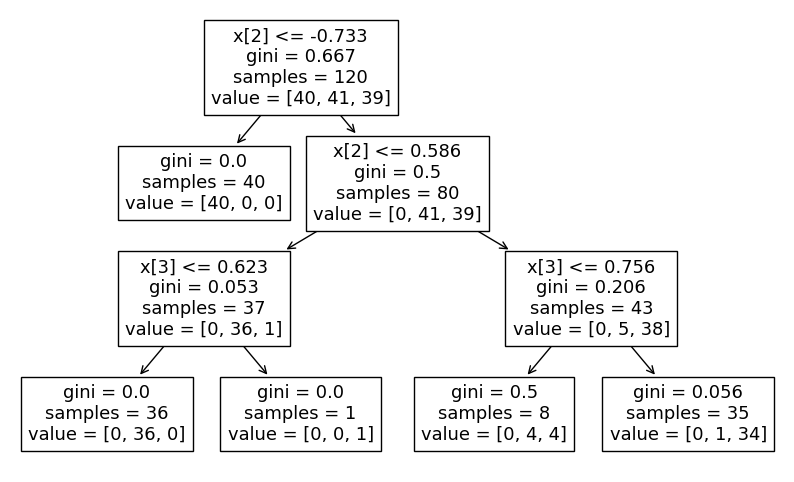

In [31]:
plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

#**Kesimpulan**

Dari beberapa metode yang digunakan yaitu Decision Tree, KNN , Naive Bayes dan ANN untuk klasifikasi menggunakan dataset iris yang berjumlah 150 data dengan jumlah label sebanyak 3 kelas dimana masing-masing kelas terdapat 50 data . Kemudian dilakukan pembagian data 80:20 yaitu data training sebanyak 80% dan data latih sebanyak 20%. Maka didapatkan hasil sebagai berikut:
1. pada metode Decision Tree nilai akurasi yang didapat menggunakan kriteria indeks Gini dengan batasan kedalaman maksimum pohon (max_depth) adalah 3 didapatkan hasil akurasi 1.0 atau 100%.
2. pada metode KNN nilai akurasi yang didapat yaitu 1.0 dengan jumlah k = 5.
3. pada metode Naive Bayes didapatkan hasil akurasi 0.1 atau 100%.
4. pada metode ANN didapatkan hasil akurasi 0.93